In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")


In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

# 数据基本信息处理

In [3]:
data = pd.read_csv('ckd_Numerical.csv')

missing_rows = data[data.isnull().any(axis=1)]
num_missing_rows = len(missing_rows)

print("存在缺失值的行数：", num_missing_rows)

存在缺失值的行数： 242


In [4]:
# 数据类型
data.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class      int64
dtype: object

In [5]:
# 缺失值统计
data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

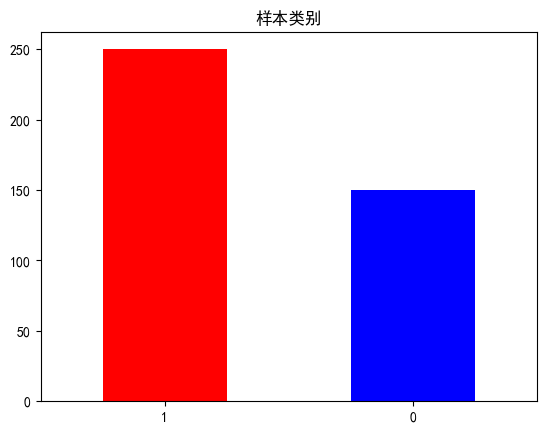

In [6]:
# 对class进行直观可视化
data['class'].value_counts().plot(kind='bar', color=['r', 'b'],
                                  title="样本类别")
plt.xticks(rotation=0)
plt.show()

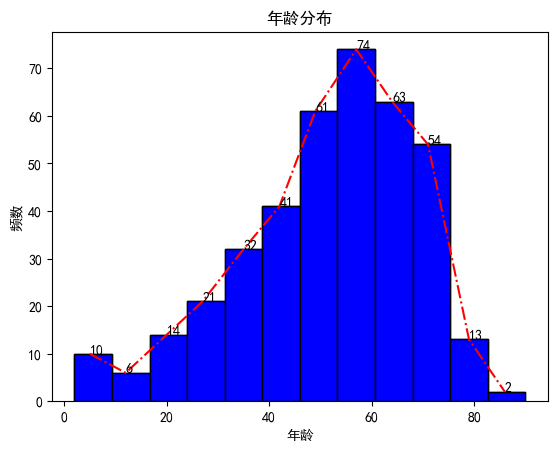

In [7]:
# 绘制年龄分布的直方图
plt.hist(data['age'], bins=12, edgecolor='black', color='b')
text = plt.hist(data['age'], bins=12, edgecolor='black', color='b')
y = list(int(i) for i in text[:][0])
x = list(text[:][1])
x = list(int((x[i] + x[i - 1]) / 2) for i in range(len(x)) if i >= 1)
# 绘制折线图
plt.plot(x, y, 'r-.', linewidth=1.5)
for i in range(len(x)):
    plt.text(x[i], y[i], f'{y[i]}')

plt.xlabel('年龄')
plt.ylabel('频数')
plt.title('年龄分布')
plt.show()

# 使用k-均值填充缺失值

In [8]:
# 使用k-均值填充缺失值
imputer = KNNImputer(n_neighbors=17)
fill_data = data.iloc[:, :-1]
filled_data = imputer.fit_transform(fill_data).round(3)
df = pd.DataFrame(filled_data, columns=data.columns[:-1])
# print(df)
df['class'] = [int(k) for k in data['class']]
# round
columns_to_convert = ["age", "bp", "al", "su", "rbc", "pc", "pcc", "ba", "bgr", "bu", "sod", "pcv", "wbcc", "htn", "dm",
                      "cad", "appet", "pe", "ane"]
for item in columns_to_convert:
    df[item] = [round(k) for k in df[item]]


print(df.isnull().sum())

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


In [9]:
df.to_csv('数据.csv', index=False)

In [10]:
print(df.dtypes)

age        int64
bp         int64
sg       float64
al         int64
su         int64
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr        int64
bu         int64
sc       float64
sod        int64
pot      float64
hemo     float64
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object


# 数据分析以及可视化分析

In [11]:
# 读取处理好的数据
df = pd.read_csv('数据.csv')

In [12]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5.200,1,1,0,1,0,0,1
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.888,0,0,0,1,0,0,1
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.824,0,1,0,0,0,1,1
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.900,1,0,0,0,1,1,1
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.600,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,1,1,0,0,140,...,47,6700,4.900,0,0,0,1,0,0,0
396,42,70,1.025,0,0,1,1,0,0,75,...,54,7800,6.200,0,0,0,1,0,0,0
397,12,80,1.020,0,0,1,1,0,0,100,...,49,6600,5.400,0,0,0,1,0,0,0
398,17,60,1.025,0,0,1,1,0,0,114,...,51,7200,5.900,0,0,0,1,0,0,0


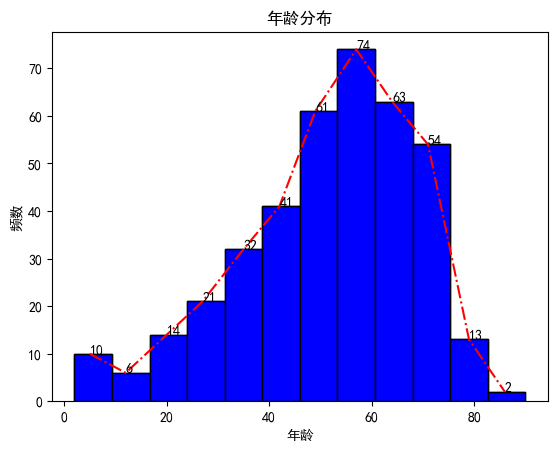

In [40]:
# 绘制年龄分布的直方图
plt.hist(data['age'], bins=12, edgecolor='black', color='b')
text = plt.hist(data['age'], bins=12, edgecolor='black', color='b')
y = list(int(i) for i in text[:][0])
x = list(text[:][1])
x = list(int((x[i] + x[i - 1]) / 2) for i in range(len(x)) if i >= 1)
# 绘制折线图
plt.plot(x, y, 'r-.', linewidth=1.5)
for i in range(len(x)):
    plt.text(x[i], y[i], f'{y[i]}')

plt.xlabel('年龄')
plt.ylabel('频数')
plt.title('年龄分布')
plt.show()

In [13]:
df.dtypes

age        int64
bp         int64
sg       float64
al         int64
su         int64
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr        int64
bu         int64
sc       float64
sod        int64
pot      float64
hemo     float64
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

In [14]:
# 分类型
cat_cols = [col for col in df.columns if df[col].dtype == "int64"]
#  连续型
num_cols = [col for col in df.columns if df[col].dtype != "int64"]
for col in cat_cols:
    print("变量:", col)
    counts = df[col].value_counts()
    if len(counts) <= 2:
        df[col] = df[col].astype('object')

# 分类型
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
#  连续型
num_cols = [col for col in df.columns if df[col].dtype != "object"]

变量: age
变量: bp
变量: al
变量: su
变量: rbc
变量: pc
变量: pcc
变量: ba
变量: bgr
变量: bu
变量: sod
变量: pcv
变量: wbcc
变量: htn
变量: dm
变量: cad
变量: appet
变量: pe
变量: ane
变量: class


In [15]:
# 分离数值变量与分类变量
Nu_feature = list(num_cols[:-1])

Ca_feature = list(cat_cols)

In [16]:
for i in Ca_feature:
    print(df[i].value_counts())
    print('\n')
    

1    313
0     87
Name: rbc, dtype: int64


1    320
0     80
Name: pc, dtype: int64


0    358
1     42
Name: pcc, dtype: int64


0    378
1     22
Name: ba, dtype: int64


0    253
1    147
Name: htn, dtype: int64


0    263
1    137
Name: dm, dtype: int64


0    366
1     34
Name: cad, dtype: int64


1    318
0     82
Name: appet, dtype: int64


0    324
1     76
Name: pe, dtype: int64


0    340
1     60
Name: ane, dtype: int64


1    250
0    150
Name: class, dtype: int64




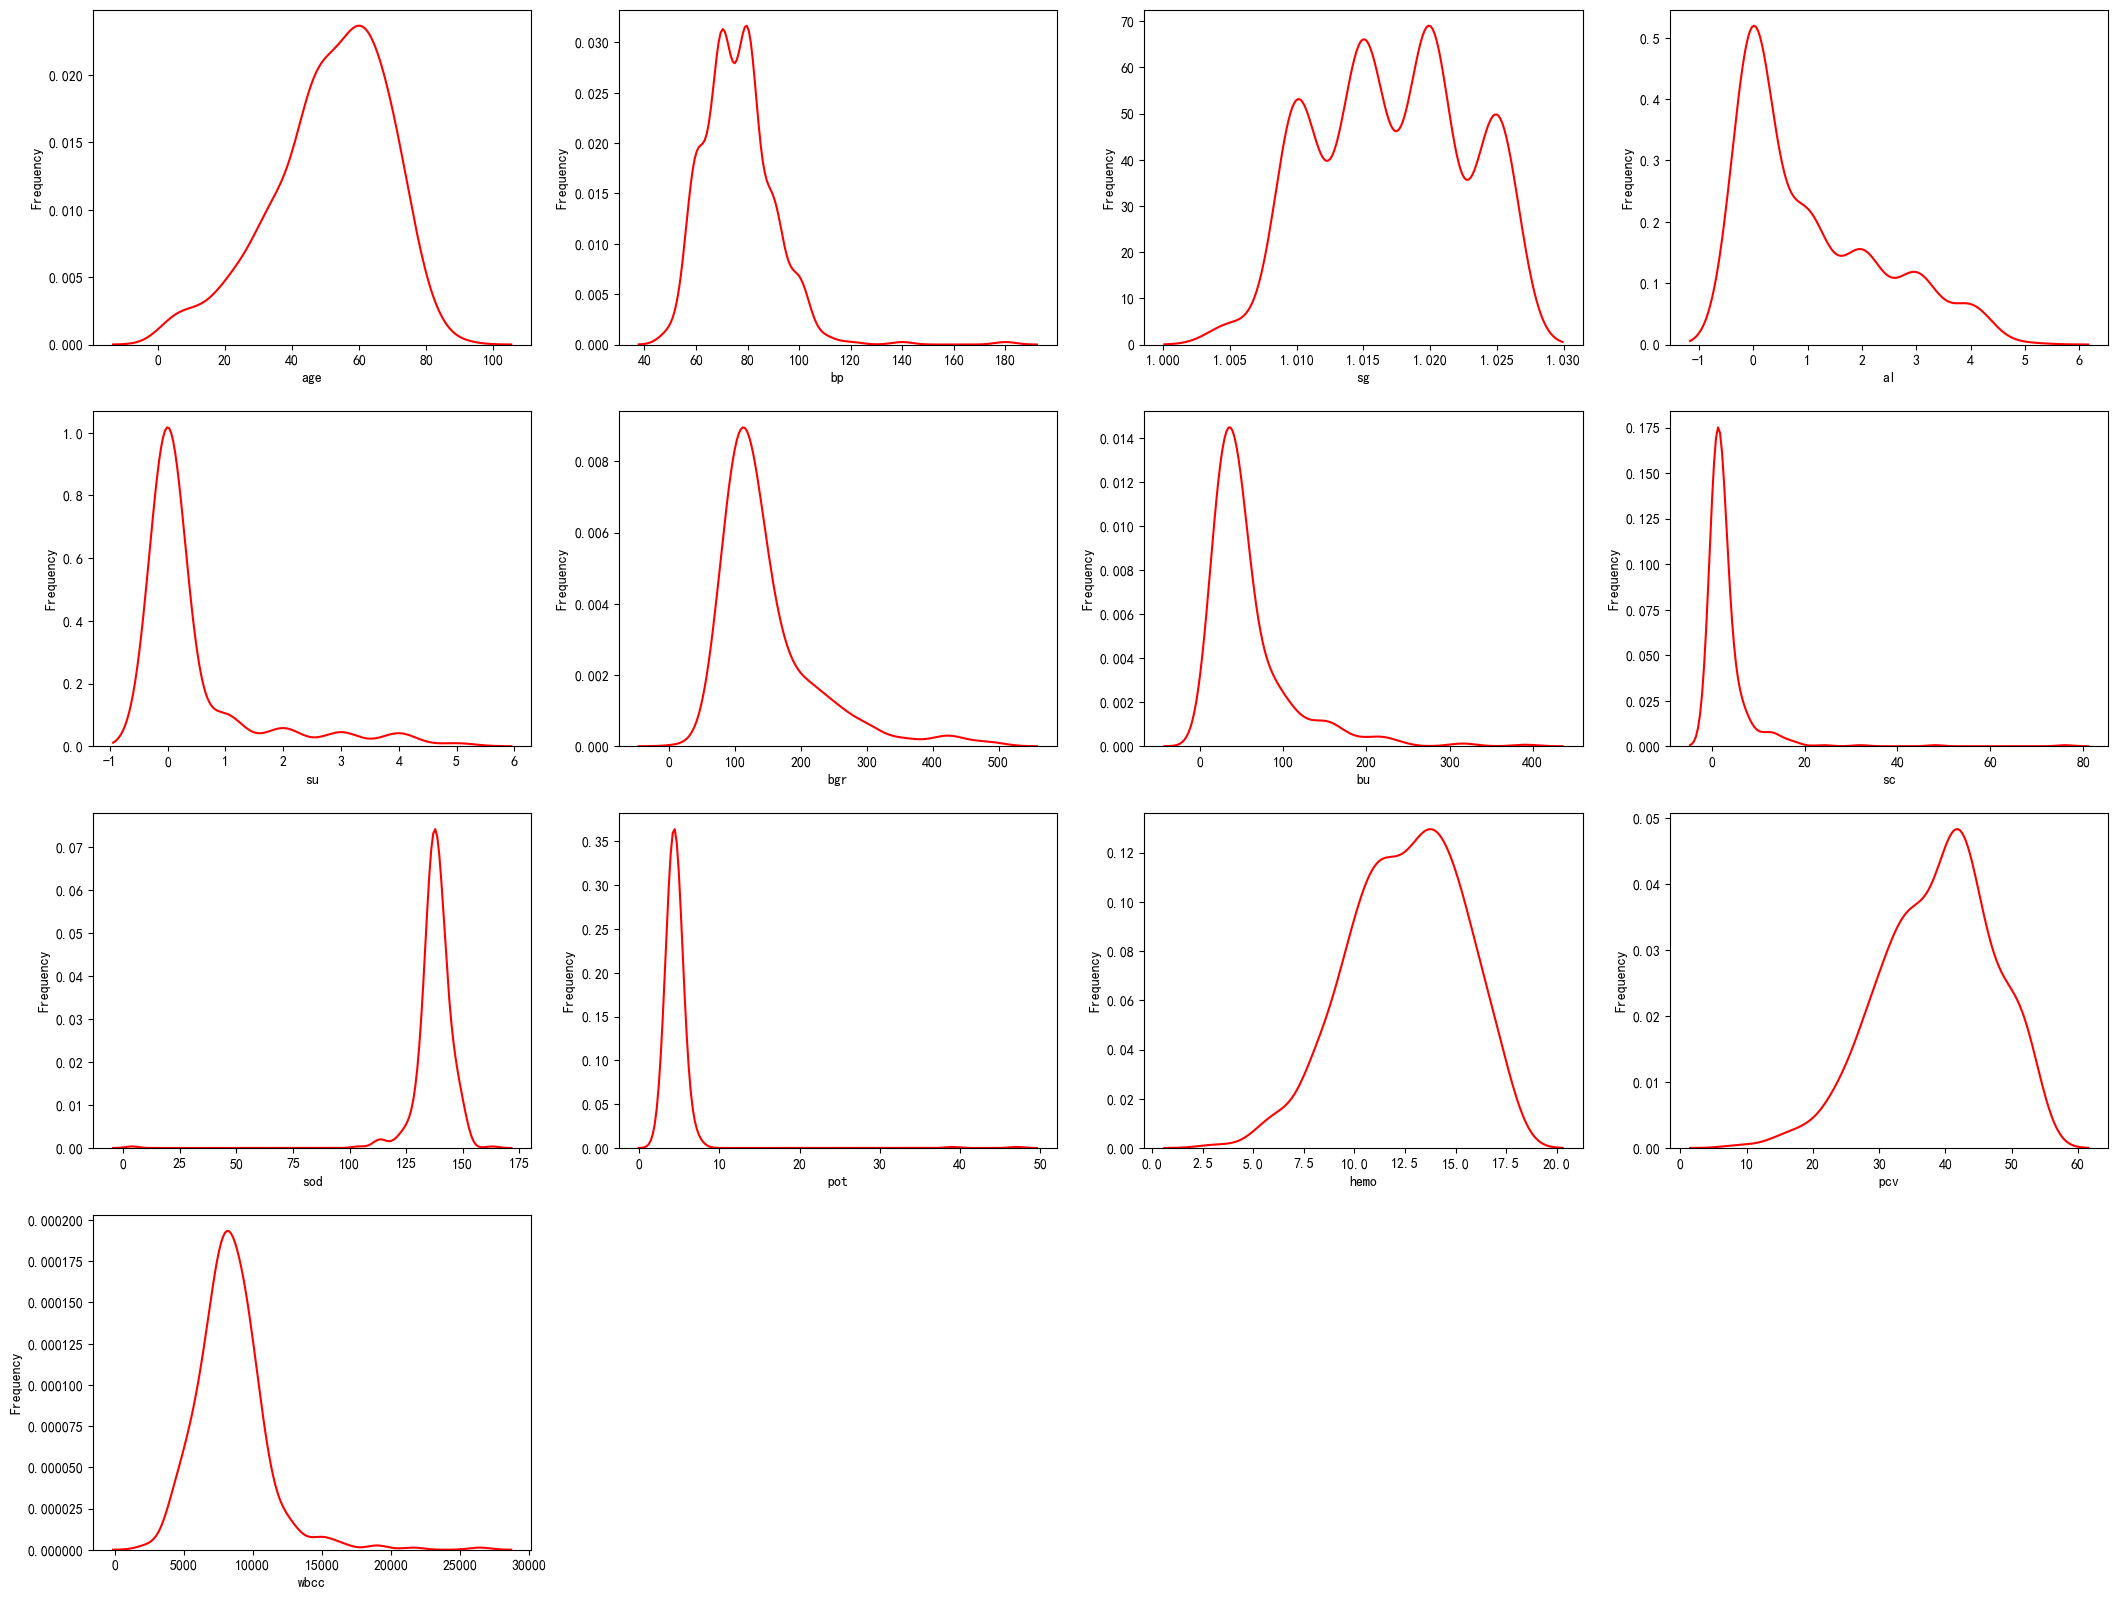

In [17]:
# 查看训练集与测试集数值变量分布
plt.figure(figsize=(26, 20))
i = 1
for col in Nu_feature:
    ax = plt.subplot(4, 4, i)
    ax = sns.kdeplot(df[col], color='red')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    i += 1
plt.show()

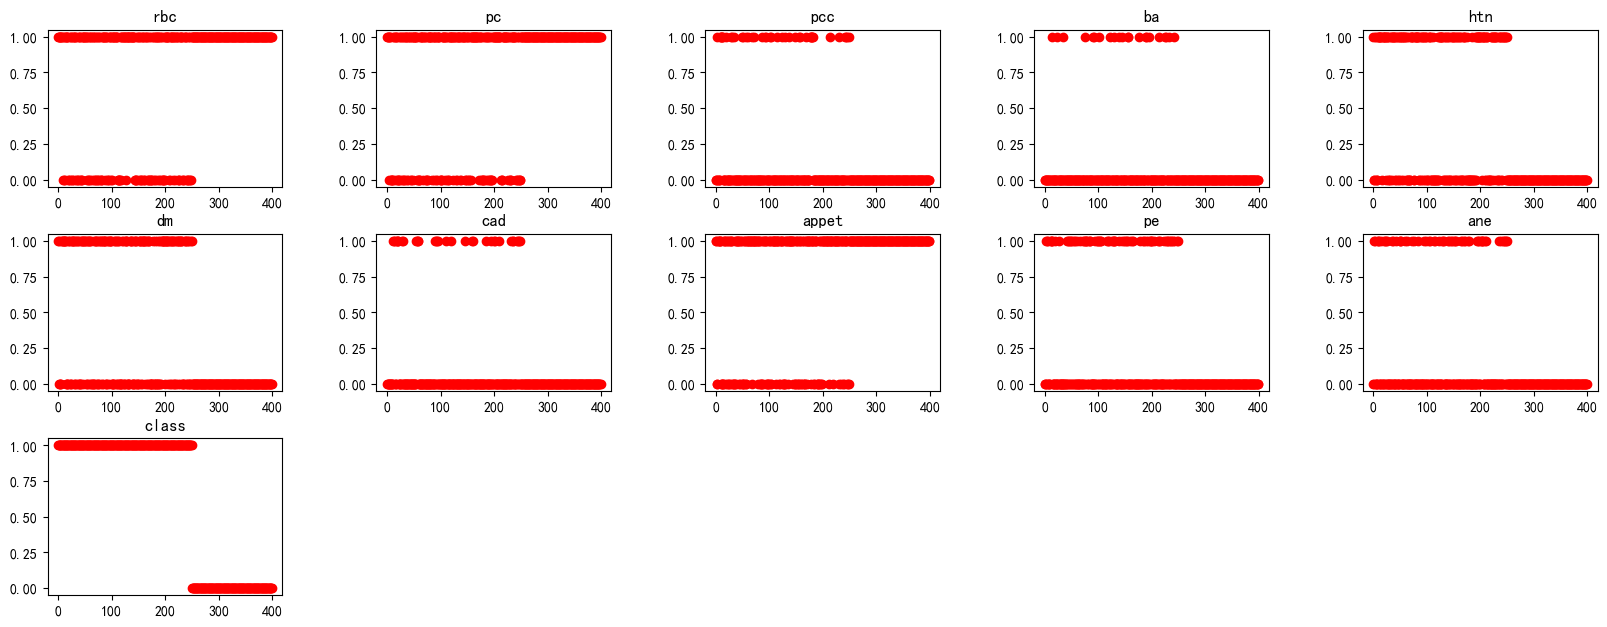

In [18]:
col1 = Ca_feature
plt.figure(figsize=(20, 10))
j = 1
for col in col1:
    plt.subplot(4, 5, j)
    ax = plt.scatter(x=range(len(df)), y=df[col], color='red')
    plt.title(col)
    j += 1

plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

In [19]:
df.dtypes

age        int64
bp         int64
sg       float64
al         int64
su         int64
rbc       object
pc        object
pcc       object
ba        object
bgr        int64
bu         int64
sc       float64
sod        int64
pot      float64
hemo     float64
pcv        int64
wbcc       int64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [20]:
float_cols = [col for col in df.columns if df[col].dtype == "float64"]

In [21]:
# 读取处理好的数据
df = pd.read_csv('数据.csv')

# 异常值检测以及处理

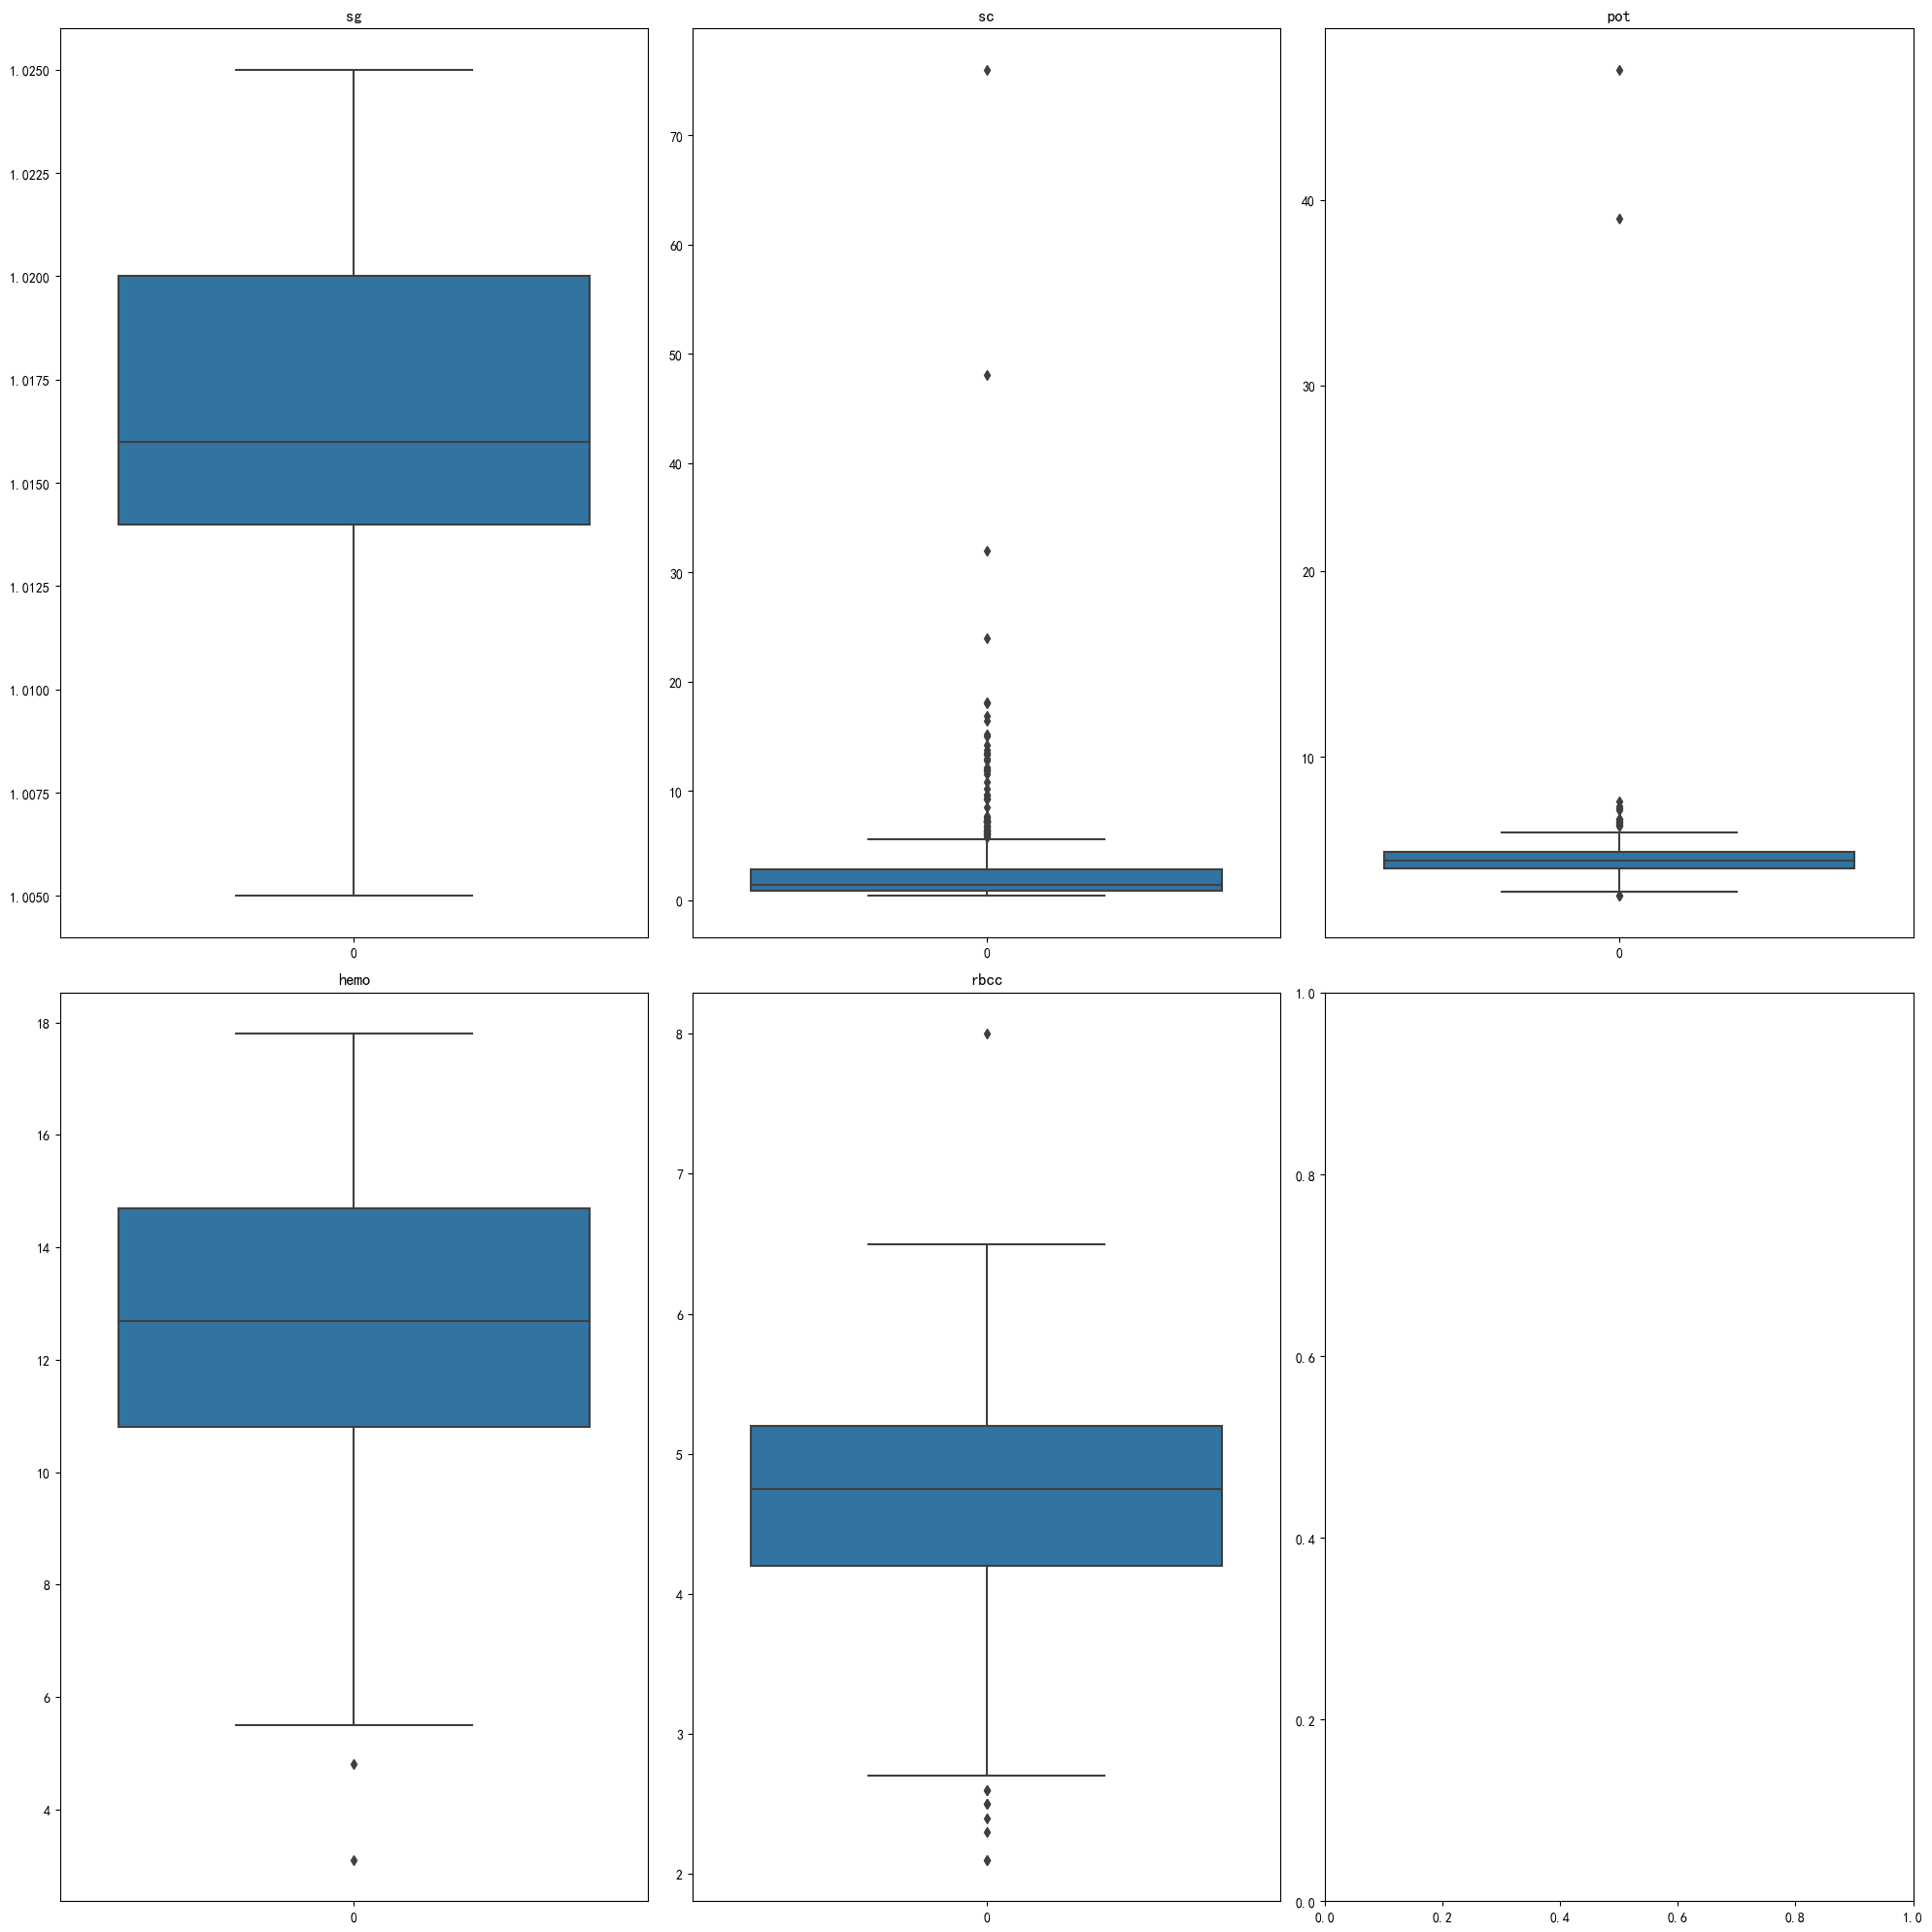

In [22]:
# 使用seaborn绘制多个特征的子图箱线图
# 这通常可以提供更美观的默认样式
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
for i, col in enumerate(float_cols):
    sns.boxplot(data=df[col], ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(col)
plt.tight_layout()
plt.show()

In [23]:
outlier_count = 0
Q1 = df['hemo'].quantile(0.25)
Q3 = df['hemo'].quantile(0.75)
IQR = Q3 - Q1
outlier_count += ((df['hemo'] < Q1 - 1.5 * IQR) | (df['hemo'] > Q3 + 1.5 * IQR)).sum()

print("异常值的个数：", outlier_count)

异常值的个数： 2


In [24]:
outlier_count = 0
outlier_indices = []
for col in float_cols[2:]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count += ((df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)).sum()
    outlier_indices.append(list(df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index))

outlier_indices = list(set(sum(outlier_indices, [])))
print("异常值的个数：", len(outlier_indices))
print("异常值的索引：", outlier_indices)

异常值的个数： 24
异常值的索引： [128, 3, 133, 136, 14, 283, 160, 161, 34, 37, 172, 177, 60, 61, 193, 73, 204, 84, 98, 232, 113, 245, 246, 249]


In [25]:
p_counts = 0
n_counts = 0
for i in outlier_indices:
    if df['class'][i]==1:
        p_counts +=1
    else:
        n_counts +=1
print('正样本异常值个数：', p_counts)
print('负样本异常值个数：', n_counts)

正样本异常值个数： 23
负样本异常值个数： 1


In [26]:
for i in outlier_indices:
    # 删除索引的行
    df = df.drop(i)

df_reset = df.reset_index(drop=True)
print(df_reset)

     age  bp     sg  al  su  rbc  pc  pcc  ba  bgr  ...  pcv  wbcc   rbcc  \
0     48  80  1.020   1   0    1   1    0   0  121  ...   44  7800  5.200   
1      7  50  1.020   4   0    1   1    0   0  121  ...   38  6000  4.888   
2     62  80  1.010   2   3    1   1    0   0  423  ...   31  7500  4.824   
3     51  80  1.010   2   0    1   1    0   0  106  ...   35  7300  4.600   
4     60  90  1.015   3   0    1   1    0   0   74  ...   39  7800  4.400   
..   ...  ..    ...  ..  ..  ...  ..  ...  ..  ...  ...  ...   ...    ...   
371   55  80  1.020   0   0    1   1    0   0  140  ...   47  6700  4.900   
372   42  70  1.025   0   0    1   1    0   0   75  ...   54  7800  6.200   
373   12  80  1.020   0   0    1   1    0   0  100  ...   49  6600  5.400   
374   17  60  1.025   0   0    1   1    0   0  114  ...   51  7200  5.900   
375   58  80  1.025   0   0    1   1    0   0  131  ...   53  6800  6.100   

     htn  dm  cad  appet  pe  ane  class  
0      1   1    0      1   0    

In [27]:
df_reset = df.reset_index(drop=True)
print(df_reset)

     age  bp     sg  al  su  rbc  pc  pcc  ba  bgr  ...  pcv  wbcc   rbcc  \
0     48  80  1.020   1   0    1   1    0   0  121  ...   44  7800  5.200   
1      7  50  1.020   4   0    1   1    0   0  121  ...   38  6000  4.888   
2     62  80  1.010   2   3    1   1    0   0  423  ...   31  7500  4.824   
3     51  80  1.010   2   0    1   1    0   0  106  ...   35  7300  4.600   
4     60  90  1.015   3   0    1   1    0   0   74  ...   39  7800  4.400   
..   ...  ..    ...  ..  ..  ...  ..  ...  ..  ...  ...  ...   ...    ...   
371   55  80  1.020   0   0    1   1    0   0  140  ...   47  6700  4.900   
372   42  70  1.025   0   0    1   1    0   0   75  ...   54  7800  6.200   
373   12  80  1.020   0   0    1   1    0   0  100  ...   49  6600  5.400   
374   17  60  1.025   0   0    1   1    0   0  114  ...   51  7200  5.900   
375   58  80  1.025   0   0    1   1    0   0  131  ...   53  6800  6.100   

     htn  dm  cad  appet  pe  ane  class  
0      1   1    0      1   0    

# 相关性分析

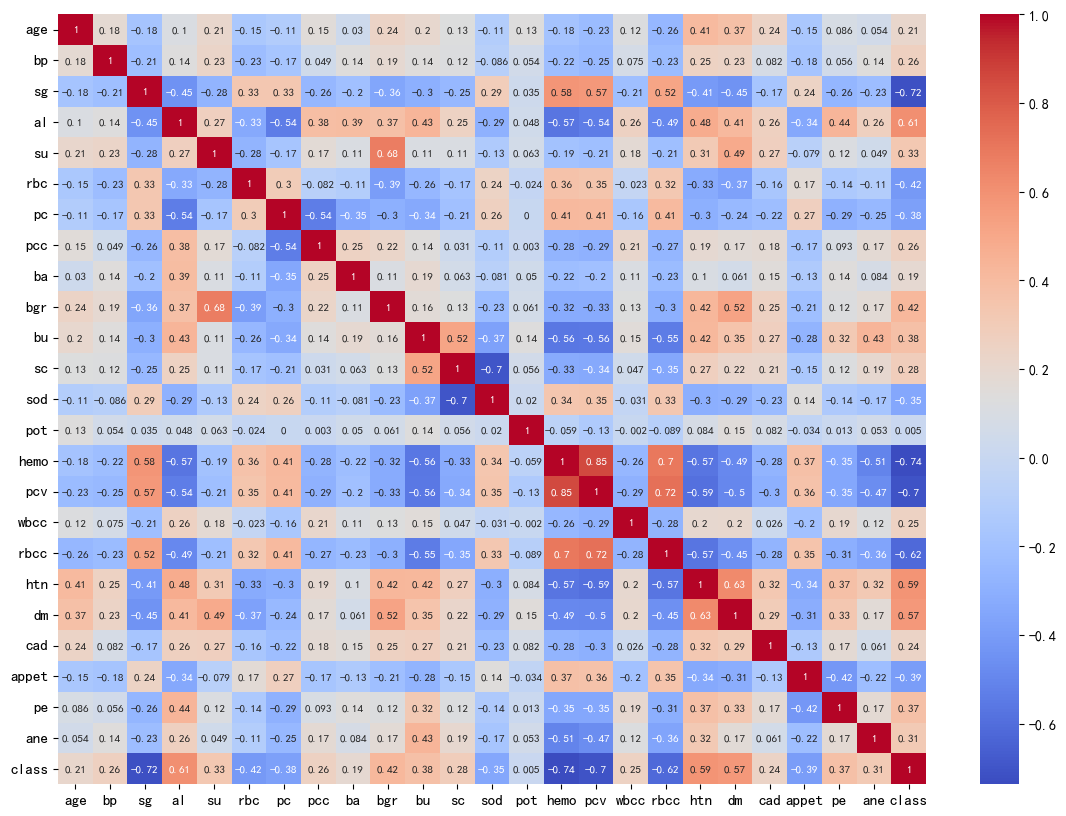

In [28]:
# 计算相关性矩阵并保留两位小数
plt.figure(figsize=(14, 10))
corr_matrix = df_reset.corr().round(3)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.yticks(size=11, rotation=0)
plt.xticks(size=11, rotation=0)
plt.show()

In [29]:
print(len(col1))
freq_dist = []
for k in range(len(col1)):
    freq_dist.append(f'freq_dist{i}')

11


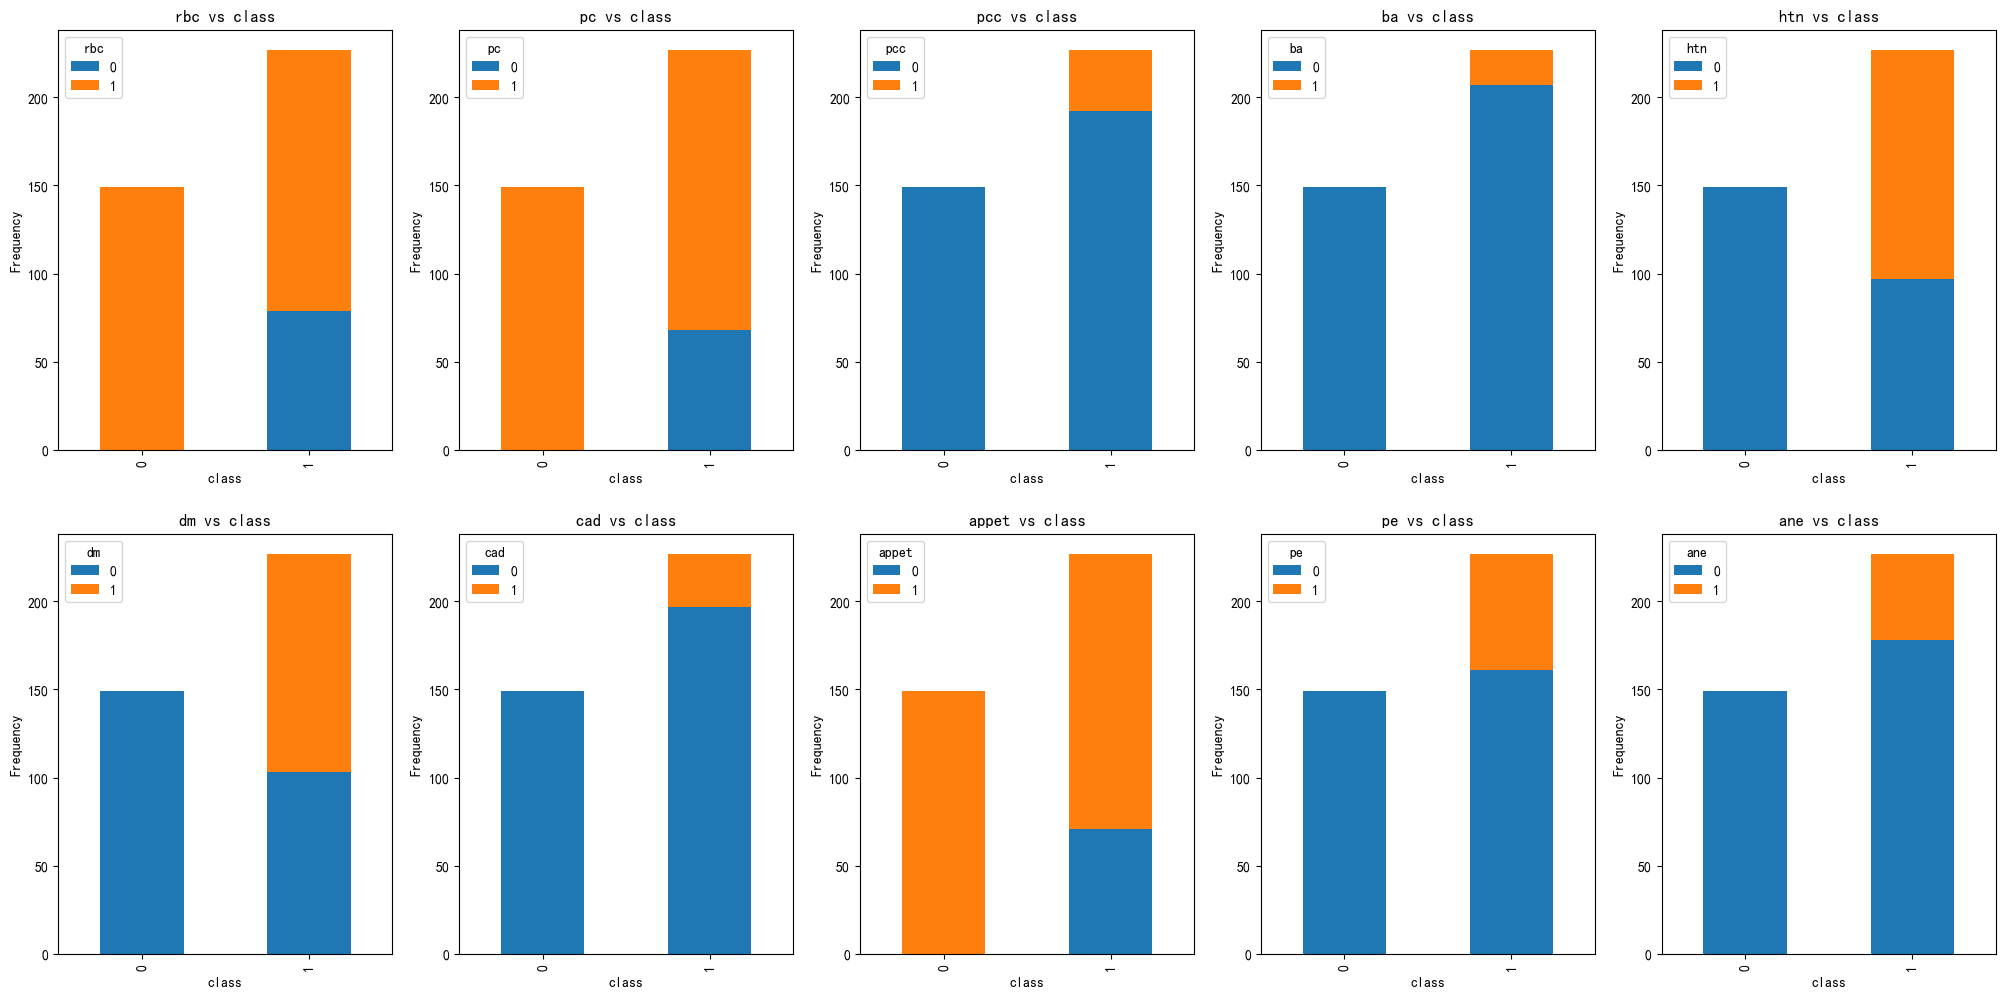

In [30]:
# 创建一个包含11个子图的画布
fig, axes = plt.subplots(2, 5, figsize=(25, 12))
for i in range(10):
    # 在每个子图中绘制堆叠条形图
    freq_dist[i] = df_reset.groupby(['class', col1[i]]).size().unstack()
    freq_dist[i].plot(kind='bar', stacked=True, ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(f'{col1[i]} vs class')
    axes[i // 5, i % 5].set_xlabel('class')
    axes[i // 5, i % 5].set_ylabel('Frequency')
# 显示图形
plt.show()

# 模型构建

In [31]:
# 获取目标变量与其他变量的相关系数
correlations = corr_matrix['class'].abs().sort_values(ascending=False)

# 选择相关性较高的变量
top_factors = correlations[correlations > 0.38].index.tolist()
print("主要因素：", top_factors)
print("因素个数：", len(top_factors))

主要因素： ['class', 'hemo', 'sg', 'pcv', 'rbcc', 'al', 'htn', 'dm', 'bgr', 'rbc', 'appet', 'pc']
因素个数： 12


In [32]:
y = df_reset.iloc[:, -1].to_numpy()
X = df_reset.iloc[:, :-1].to_numpy()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建SVM分类器并进行训练
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 在测试集上进行预测并计算准确率
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9380530973451328


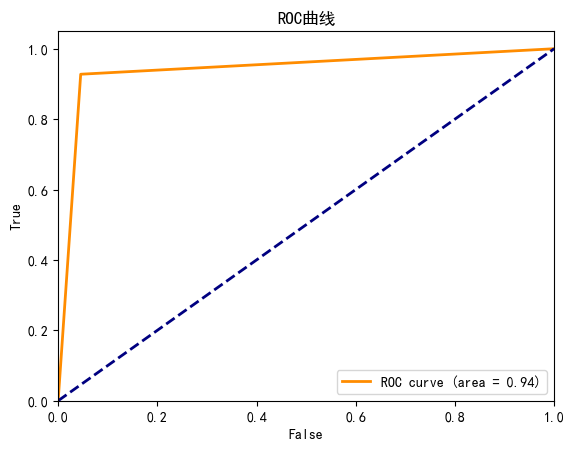

In [33]:
# 预测概率值
y_score = svm.predict(X_test)

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False')
plt.ylabel('True')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()

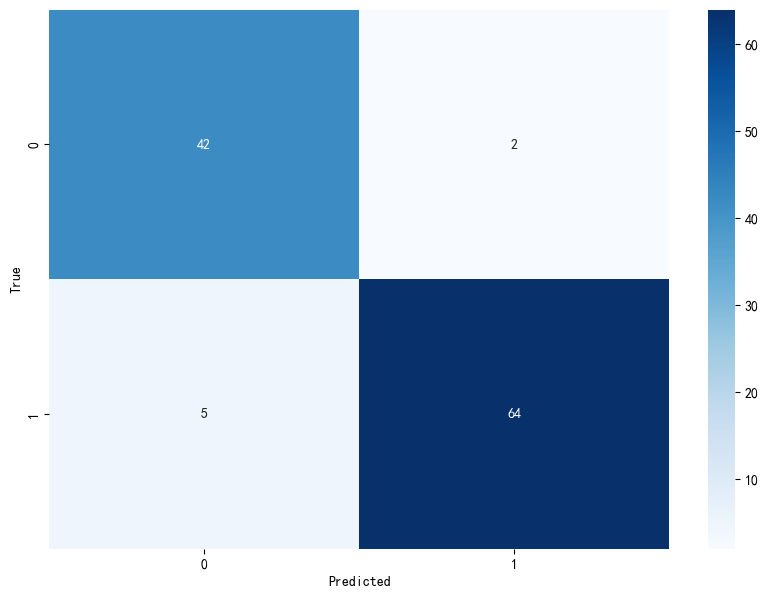

In [34]:
# 生成混淆矩阵
cm = confusion_matrix(y_test, y_score)

# 使用Seaborn绘制混淆矩阵的热图
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_score)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("准确率：", accuracy)
print("精确率：", precision)
print("召回率：", recall)
print("F1分数：", f1)

准确率： 0.9380530973451328
精确率： 0.975145923554886
召回率： 0.9734513274336283
F1分数： 0.9735939576647541


In [38]:
# 创建PCA对象并进行降维
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca)

# 创建SVM分类器并进行训练
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

# 在测试集上进行预测并计算准确率
y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[[-2.03383417e+02  9.43295006e+00  7.40279076e+01 ... -2.59570150e+00
  -7.97633638e-01 -9.74975200e-01]
 [-2.60383343e+03 -5.23153498e+01 -6.79818925e+00 ...  2.86395464e+00
   2.26257638e+00 -5.66115222e-01]
 [-7.74697970e+02 -1.61275160e+01 -3.12107852e+01 ... -5.80072136e-02
  -4.21780288e-01 -4.81107219e-01]
 ...
 [-1.03695065e+02 -3.49248123e+01  3.61513486e+00 ... -3.17537256e+00
  -1.70756189e+00 -2.21928191e-01]
 [ 2.09620785e+03 -4.93700482e+01 -2.64146229e+01 ...  3.11470763e+00
   1.40640945e+00 -3.97598461e-01]
 [ 5.97082315e+02  1.47512966e+02  3.17902435e-02 ... -2.32275018e+00
   3.75488421e-01  8.71530653e-01]]
Accuracy: 0.9734513274336283


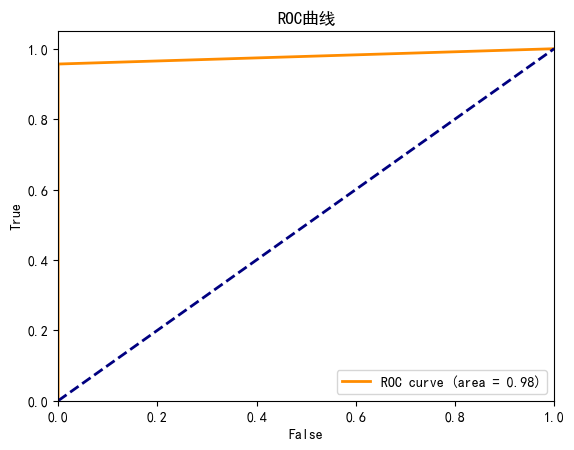

In [39]:
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False')
plt.ylabel('True')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()

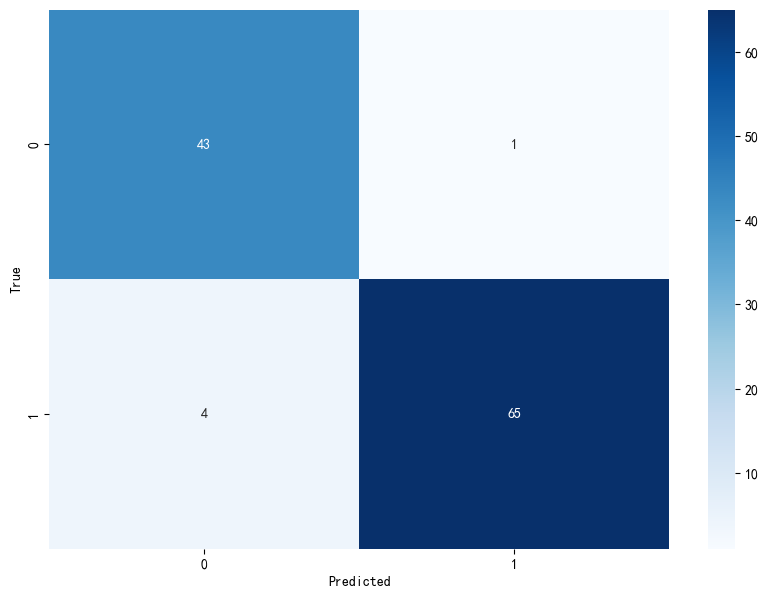

In [37]:
# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 使用Seaborn绘制混淆矩阵的热图
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("准确率：", accuracy)
print("精确率：", precision)
print("召回率：", recall)
print("F1分数：", f1)

准确率： 0.9734513274336283
精确率： 0.975145923554886
召回率： 0.9734513274336283
F1分数： 0.9735939576647541
